### 统计学：检验心理学现象
背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

[WIKI中的解释](https://zh.wikipedia.org/wiki/%E6%96%AF%E7%89%B9%E9%B2%81%E6%99%AE%E6%95%88%E5%BA%94)


这个效应展示了人们对事物的认知过程已是一个自动化的历程。当有一个新的刺激出现时，如果它的特征和原先的刺激相似或符合一致，便会加速人们的认知；反之，若新的刺激特征与原先的刺激不相同，则会干扰人们的认知，使人们的所需的反应时间变长。


### 1.自变量和因变量

自变量：两种不同类型的测试条件。分别为，颜色与字面意思一致和颜色与字面意思不一致。

应变量：测试完成的事件。

### 2.假设集

$$H_0: T_{Con} = T_{Incon}$$


$$H_1:T_{Con} \not= T_{Incon}$$

$T_{Con}$：字面意思与文字颜色一致时测试所消耗的平均时间。

$T_{Incon}$：字面意思与文字颜色不一致时测试所消耗的平均时间。

零假设$H_0$：字面意思与文字颜色一致时所消耗的平均时间与不一致时所消耗的平均时间相等。

备择假设$H_1$：字面意思与文字颜色一致时所消耗的平均时间与不一致时所消耗的平均时间不相等。

### 3.统计检验模型选择

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('stroopdata.csv')
print('样本量为：',df.shape[0])
print('样本组数为：',df.shape[1])

样本量为： 24
样本组数为： 2


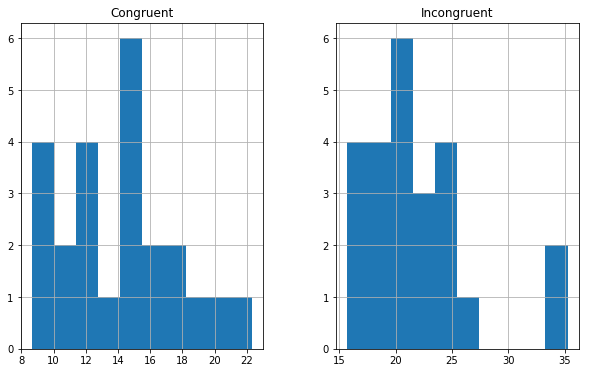

In [3]:
df.hist(figsize=(10,6));

1.样本数24<30，属于小样本，同时未知总体参数，因此不能选择Z检验，选择t检验。

2.两组样本为同一个人针对不同条件下所用的时间，因此可以判断为相关样本。

3.并且两组数据为常态分布，因此可以选择配对t检验。

此处如何选择假设检验模型参考的是[如何选择假设检验](https://blog.csdn.net/qq_37327056/article/details/79533772)

### 4.集中趋势与变异值测量

In [4]:
print('字面与颜色一致时：')
mean1 = df['Congruent'].mean()
std1 = df['Congruent'].std()
print('平均值为：{}(s)\n标准差为：{}(s)'.format(mean1, std1))
print('字面与颜色不一致时：')
mean2 = df['Incongruent'].mean()
std2 = df['Incongruent'].std()
print('平均值为：{}(s)\n标准差为：{}(s)'.format(mean2, std2))

字面与颜色一致时：
平均值为：14.051124999999999(s)
标准差为：3.5593579576451955(s)
字面与颜色不一致时：
平均值为：22.015916666666666(s)
标准差为：4.797057122469138(s)


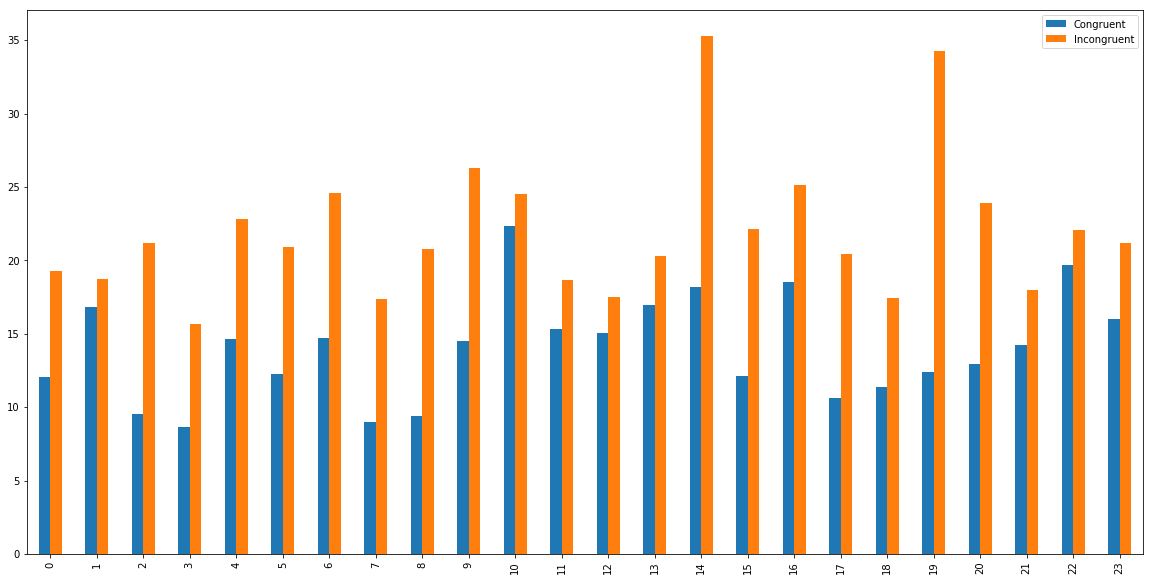

In [5]:
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,1,1)
df.plot(kind='bar',ax=ax);

根据描述分析的平均数和标准差，我们可以看出，不一致所消耗的平均时间比一致时的要长，同时，不一致消耗的平均时间的标准差也比一致的要大。并且根据每一组的对照结果，我们也得出了不一致时实验所消耗的事件都比一致时所消耗的时间要长。

### 5.统计检验

我们假设显著性水平为0.05，记为α=0.05。

#### 调用库计算t值，p值

此处运用的是两个相关样本的t检验，因为零假设，因此是双侧检验。参考[stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel)相关文档

In [6]:
from scipy import stats
t,p_value = stats.ttest_rel(df['Incongruent'],df['Congruent'])
t,p_value

(8.020706944109957, 4.103000585711178e-08)

#### 公式计算

计算两个样本的均值差$\bar{d}$

计算配对样本差值的标准差s

样本数n为24

自由度df=n-1=23

In [8]:
df['difference'] = df['Incongruent'] - df['Congruent']
#计算均值差和标准差
d = df['Incongruent'].mean() - df['Congruent'].mean()
s = df['difference'].std()
d, s

(7.964791666666667, 4.864826910359056)

根据[配对t检验计算公式](https://www.statsdirect.com/help/parametric_methods/paired_t.htm), 得t值为8.0207。由于自由度为23，α=0.05， 双尾检测α/2=0.025，查t表得到t临界值为±2.069，P值也远小于0.05。

并且得到的置信区间为[5.91, 10.02]

#### 分析

首先我们分析调用库得到的p值，双尾检验，p值4.103000585711178e-08 < α，所以可以拒绝零假设。

其次根据公式得到的t值与调用库得到的t值相同为8.0207，t临界值为2.069。因为8.0207 > 2.069，并且8.0207也在置信区间内，也可以拒绝零假设。得到不一致时测试的平均时间大于一致时测试的平均时间的结论。

#### 6.总结

最终我们假设检验的结果与描述统计时得出的结论是一致的，也就是在文字意义与实际颜色不一致的时候，人的反应普遍会变慢。查阅百度百科所介绍的：斯特鲁普效应在心理学中指优势反应对非优势反应的干扰。测试者被要求回答有颜色意义的字体的颜色时，回答字本身的意义为优势反应，而回答字体颜色为非优势反应，若字体颜色与自意不同，被测者往往会反应速度下降，出错率上升。

这是因为首先文字的意思是我们的第一反应，称之为优势反应，字体的颜色称之为非优势反应，因此在表达不一致时，最终我们的测试时间会比一致的时候要慢，这个样本数据也得出了相同的结论。

当然我的理解是人会不自觉的联想文字本身的意思，接着才会反应字体的颜色，这几乎是一种先天反应，是平时一直经历常规的事物所训练出来的一种本领，这短时间内是适应不了的。这就好比更换自行车的驾驶方向，左边往右，右边往左是一样的道理。

短时间内斯特鲁普效应是明显的，正如数据集中最小的差值仅仅为两秒，多次训练过后，我认为其相差的时间也会变小。

